In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import morton
import base64

In [2]:
df = pd.read_csv ('../Data/Messfahrten/20220921/CSV/Testgelaende/Testgelaende_noise_LC/opendlv.device.gps.pos.Grp1Data-0.csv', sep=';', usecols = ['sampleTimeStamp.seconds','sampleTimeStamp.microseconds','lat', 'lon', 'speed', 'accel_lon', 'accel_trans', 'accel_down'])
#df.rename(columns = {'timestamp:10881:<lon>':'ts', 'accel_lon:10881:<double>':'accel_lon', 'accel_trans:10881:<double>':'accel_trans', 'accel_down:10881:<double>':'accel_down'}, inplace = True)

df['ts'] = (df['sampleTimeStamp.seconds']*1000000)+df['sampleTimeStamp.microseconds']

In [3]:
label = pd.read_csv('../Data/Messfahrten/20220921/CSV/Testgelaende/Testgelaende_noise_LC/opendlv.system.LogMessage-999.csv', sep=';', usecols=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds','description'])
label['ts'] = (label['sampleTimeStamp.seconds']*1000000)+label['sampleTimeStamp.microseconds']
label['label'] = label['description'].apply(lambda b: str(base64.b64decode(b)))
#label = label[label['label'].str.contains("round") == True]
label = label.drop(columns='description')

In [4]:
df['ts'][0]

1663764199902227

In [5]:
label

,sampleTimeStamp.seconds,sampleTimeStamp.microseconds,ts,label
0,1663764208,532000,1663764208532000,b'test'
1,1663764220,980000,1663764220980000,b'noise slow'
2,1663764248,158000,1663764248158000,b'noise slow'
3,1663764275,378000,1663764275378000,b'noise middle'
4,1663764303,334000,1663764303334000,b'noise middle'
5,1663764337,210000,1663764337210000,b'noise fast'
6,1663764359,981000,1663764359981000,b'noise fast'
7,1663764386,155000,1663764386155000,b'noise accel slow'
8,1663764411,950000,1663764411950000,b'noise accel slow'
9,1663764437,199000,1663764437199000,b'noise accel fast'


<AxesSubplot:xlabel='lon'>

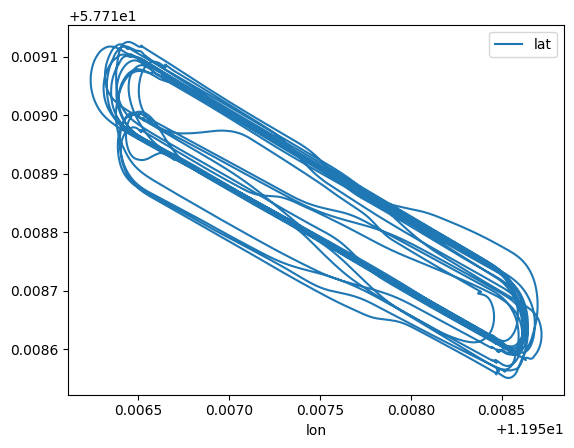

In [6]:
#faktor_multiply = 1000000; offset = 10

#df['lon_mult'] = df.apply(lambda x: int(x['lon']*faktor_multiply) , axis=1)
#df['lat_mult'] = df.apply(lambda x: int(x['lat']*faktor_multiply) , axis=1)

df.plot(x = 'lon', y = 'lat')

<AxesSubplot:xlabel='ts'>

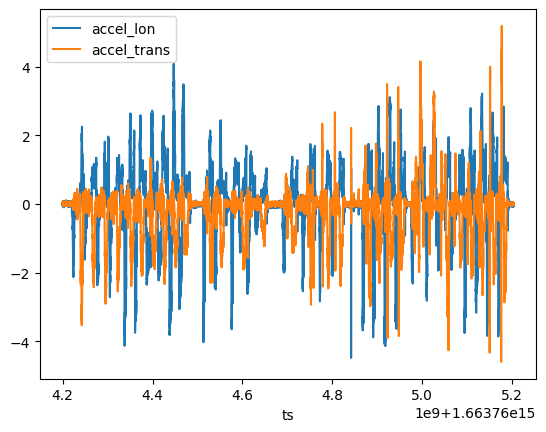

In [7]:
df.plot(x = 'ts', y = ['accel_lon', 'accel_trans'])

In [106]:
# dff = df[(df['ts'] > 1646666562000000) & (df['ts'] < 1646666566000000)]
# dff = df[(df['ts'] > 1646666550000000) & (df['ts'] < 1646666770000000)]
# dff = df[(df['ts'] > 1663764853002227) & (df['ts'] < 1663765093002227)] # lanechange
# dff = df[(df['ts'] > 1663767219379889) & (df['ts'] < 1663767219379889)] # & (df['ts'] < 1663767254379889)]
# dff = df[(df['ts'] > 1663767093379889) & (df['ts'] < 1663767111159889)]

time_stamp = 1663764359981000
dff = df[(df['ts'] > time_stamp + 5500000) & (df['ts'] < time_stamp + 11000000)]


# dff = df[(df['ts'] > 1663767714858000) & (df['ts'] < 1663767814858000)]

#dff = df[(df['accel_lon'] > 140000)]
#dff = df[(df['morton'] > 26776019010)]
#dff = df

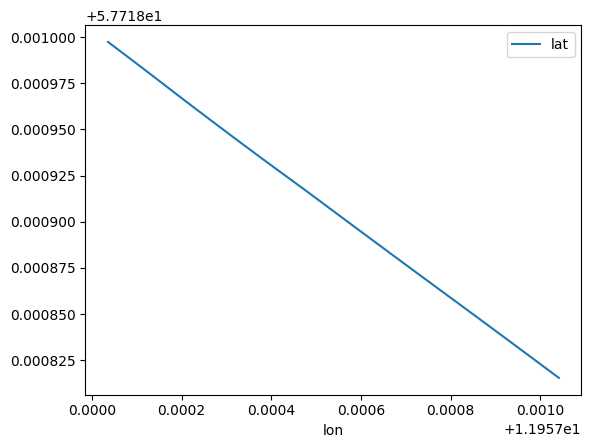

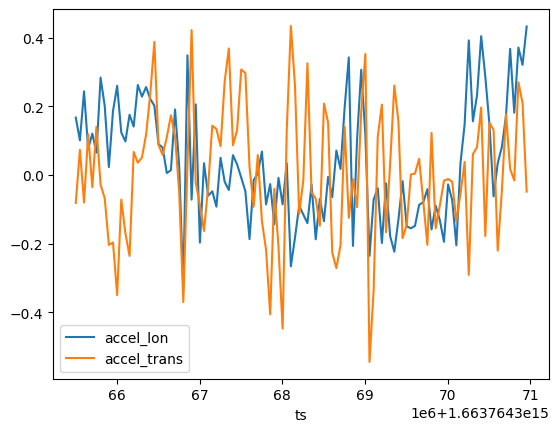

In [107]:
dff.plot(x = 'lon', y = 'lat')
plt.show()
dff.plot(x = 'ts', y=['accel_lon', 'accel_trans'] )
#for idx, row in label.iterrows():
#    plt.annotate(row['label'], (row['ts'], 2.5), rotation=60)
plt.show()


In [108]:
dff = dff.drop(columns=['ts'])

In [109]:
dff.to_csv(r'../Data/Ausschnitte/Hard_Braking/noise_straight_fast_2.csv', sep=';', index = False)